# Case inhousedag KPMG 

As stated in the case description радуга (Raduga Inc.) wants to know how much colors it has to make for the world cup 2018. Part of this big project is a simulation of the upcomming tournament. They want to have a statistical substantiated estimation. The simulation part of the project is given to the Business Analytics and the Advanced Analytics & Big Data teams of KPMG. Your mission is to write this simulation. 

The Data Management team has some data available for you. If you want a clean dataset you need to hire them (in exchange for points). You may use any other data source you might think is useful for your prediction and simulation. 

## High over suggested code setup and points distribution
You may build up your code in any way you want. The core coding language used at KPMG is python, but for this 'simple' simulation you may use any language you are comfortable with. All tips and tricks will how ever be provided in python.
### Exploration (15k)
* Look into the data what elements does it have (3k)
* what are the relevant variables for the simulation (5k)
* Can you find a function to describe the data? (7k)

### Data cleaning (25k)
* You can choose to hire an external party to clean up your data. (25k)

### Simulation (75k)
**Tip:**
Build up your code in a way that you can simulate chunks of the bigger simulation.
For example:

#### knock out phase (25k)
* single match with 50/50 chance for knock-outphase (7k)
* single round of the knock-out phase (6k)
    * make random pairs to match them up (lottery like) (5k)
* complete knock-out phase (7k)

#### group phase (25k)
* single match with 50/50 chance for group phase (5k)
* a way to keep track of the scores in the group phase (5k)
* make a round of the group phase (5k)
* complete simulation of the group phase (5k)
* how to extract the winner and follow-up in the group phase (5k)

#### weighting factor and final results (25k) 
* introduce a weighting factor between the teams from external data (historical), for a suggestion see below (10)
* combine groupphase and knockout to a complete tournament (7k)
* make a way to keep track of tournament results (8k)

#### Color distribution based on simulation results (10k) 
* develop a method to determine the color distribution needed (10k)

#### Simulation results (100k) 
* In case you get completely stuck, we offer you the possibility to buy our simulation result. This is considered a last resort in case you get completely stuck and will provide you the possibility to focus entirely on the other issues this client faces. It is however a very poor way to handle your resources.(100k)

##### Weighting factor
A suggestion for the weighting factor is down below. If you have improvements or other suggestions feel free to implement them. 

This can give bonus scores!
If $rank_A > rank_B$ then:

$P(A_{wins}) = \frac{1}{\sqrt{\log_2(\mid rank_B-rank_A\mid+1)}}$

else:

$P(A_{wins}) = 1 - \frac{1}{\sqrt{\log_2(\mid rank_B-rank_A\mid+1)}}$


## Import of all usefull packages

In [1]:
# =====================================================================================
# DO ALL YOUR DATA PREPARATION AND ANALYSIS in this file
# =====================================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import random
import itertools
from scipy.optimize import curve_fit
from scipy.misc import factorial
import os
import pylab as pylab
%matplotlib inline

# set the right enviroment variable to the data
filepath = os.chdir('//nl/kpmg/ADV/Technology/Data & Analytics/D&A - Data & Analytics/Inhousedag 2/Data')


# Data exploration

The lambda calculated for and used in the simulations is 2.4875


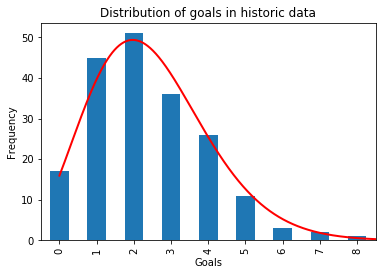

In [17]:
# ___________________________________________________________________________
# load in the data files to a pandas dataframe
fifa_ranking = pd.read_csv('Fifa_ranking_new.csv', sep=';')
games = pd.read_csv('matches.csv', sep=';')
participants = pd.read_csv('Participating_Countries.csv', sep=';')

# ___________________________________________________________________________
# create the team list which you can fill in in the tournament simulation
team_list = list(participants['Team'][participants['Year'] == 2018])

# ___________________________________________________________________________
# create the distribution of goals per match
games['sum'] = games['DP_team1'] + games['DP_team2']
table = games['year'].unique()


# ===========================================================================
# Analysis distribution goals per game
# ===========================================================================
def goals_per_game(game):
    return game['sum'].value_counts()

# __________________________________________________________________________________
# estimation for the lambda of poisson
mu = games['sum'].sum()/(len(games['sum']))
print('The lambda calculated for and used in the simulations is', mu)


# __________________________________________________________________________________
# take only the year 2010, 2006, 2002, 1998 as input for the analysis
# so that 2014 can be used as a validation set
df = pd.DataFrame()
for i in table[1:4]:
    df = df.append(goals_per_game(games[games['year'] == i]).sort_index())

# __________________________________________________________________________________
# transpose the data frame
df = df.T
data = df.sum(axis=1)

# __________________________________________________________________________________
# how does the data look like?
data.sort_index().plot(kind='bar')

# __________________________________________________________________________________
# function for a poisson fit
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)

# ____________________________________________________________________________________
# fit the function
parameters, cov_matrix = curve_fit(poisson, data.index, data.sort_index())
x_plot = np.linspace(0, 10, 1000)

# ____________________________________________________________________________________
# plot the results of the fit
plt.plot(x_plot, 192*poisson(x_plot, mu), 'r-', lw=2)
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of goals in historic data')


#plt.savefig('//nl/kpmg/ADV/Technology/Data & Analytics/D&A - Data & Analytics/Inhousedag 2/Output/poisson_histogram')
plt.show()





# Now make the functions needed to do the simulation



In [18]:
# --- this file contains a basic simulation of a footbal game
# --- The games are played in the world cup

#import load_data

# ======================================================================================================
# KNOCK OUT PHASE
# ======================================================================================================


# --- calculates how many goals are scores per team
def wed(dp, pair, weight):
    """ Simulates the results of a game between two teams
        dp --> amount of goals in a game
        pair --> the two teams playing the game
        weight --> what is the difference in strength between the teams
        The difference in strength is expressed in a num between 0 and 1
        Where if 1, team 1 is absolutely the strongest
    """
    team1_wins = False
    team1 = pair[0]
    team2 = pair[1]
    t1_goals = np.random.binomial(dp, weight)
    t2_goals = dp - t1_goals
    # --- determine who wins
    if t1_goals > t2_goals:
        team1_wins = True
    elif t1_goals < t2_goals:
        team1_wins = False
    # --- when the scores are even then flip a coin
    else:
        if np.random.binomial(1, 0.5) == 1:
            team1_wins = True
    # --- pass on the results
    if team1_wins:
        win = team1
    else:
        win = team2
    return [[t1_goals, t2_goals], win]


# --- first simulate a knock-out tournament
def pairs(teams_list):
    """ Simulates the randomness in the teams"""
    # --- shuffle the team_list for randomness
    random.shuffle(teams_list)
    pair_list = []
    while len(teams_list) > 0:
        pair = teams_list[0], teams_list[1]
        pair_list.append(pair)
        # --- remove the paired teams from the list
        del teams_list[0]
        del teams_list[0]
    return pair_list


def knockout(teams_list):
    """
        Calculates the knockout phase of the tournament
        Takes in the amount of teams playing this round
    """
    amount_of_teams = len(teams_list)
    # --- how many rounds do we need to play??
    rounds = int(np.log(amount_of_teams) / np.log(2))
    # --- save the data of round 0
    round_results = [teams_list.copy()]
    # --- simulate the results per round in the tournament
    for i in range(rounds):
        result = play_round(teams_list)
        # --- updating the team_list
        teams_list = result['winst']
        # --- saving the results of a play_round
        round_results.append(result['winst'].copy())
    return pd.DataFrame(round_results).T


def play_round(teams_list):
    """ Calculates a play round of the tournament in the knockout phase"""
    dp = np.random.poisson(mu, int(len(teams_list)/2))
    pairs_list = pairs(teams_list)
    result = []
    win = []
    # --- simulates the games between pairs
    for pair in pairs_list:
        weight = weighted(pair[0], pair[1], fifa_ranking)
        game_res = wed(dp[pairs_list.index(pair)], pair, weight)
        result.append(game_res[0])
        win.append(game_res[1])
    return {'teams': pairs_list, 'uitlag': result, 'winst': win}

# ===========================================================================
# Group phase of the tournament
# ===========================================================================


def team_dicts(teams):
    """
    Creates the structure of the data per team to log their scores
    :param teams:
    :return: list of dicts per team
    """
    list_teams = []
    for i in teams:
        team_dict = {'team_name': i, 'points': 0, 'goals_if': 0, 'goals_ag': 0, 'ranking': 0}
        list_teams.append(team_dict.copy())
    return list_teams


def groups(list_teams):
    """
    Shuffles the teams like a drawing of lots in real life and groups the teams in pouls of 4 teams
    :param list_teams: contains the team names
    :return: list which contains the pouls
    """
    random.shuffle(list_teams)
    group_list = []
    # --- groups the teams in blocks of containing 4 teams a block
    while len(list_teams) > 0:
        group = list_teams[0:4]
        group_list.append(group)
        del list_teams[0:4]
    return group_list


def game(pair, dp):
    """
    Calculates the results of single match between two teams in the poulphase
    :param pair: The teams which play against each other
    :param dp: The amount of goals which are in the game
    :return: the results of the teams to update the dicts
    """
    # --- initiate all variables needed for the simulation of a single match
    team1_wins = False
    team2_wins = False
    team1 = pair[0]
    team2 = pair[1]
    weight = weighted(team1['team_name'], team2['team_name'], fifa_ranking)
    t1_goals = np.random.binomial(dp, weight)
    t2_goals = dp - t1_goals
    # --- determine who wins
    if t1_goals > t2_goals:
        team1_wins = True
    elif t1_goals < t2_goals:
        team2_wins = True
    # --- set goal score
    team1['goals_if'] += t1_goals
    team2['goals_if'] += t2_goals
    team1['goals_ag'] += t2_goals
    team2['goals_ag'] += t1_goals
    # --- pass on the results
    if team1_wins:
        team1['points'] += 3
    elif team2_wins:
        team2['points'] += 3
    else:
        team1['points'] += 1
        team2['points'] += 1
    return [team1, team2]


def games(group):
    """ Calculates the matches of an individual group
        :parameter group in the from a dict
        :returns the updated dict
    """
    # --- which matches need to be played
    matches = itertools.combinations(group, 2)
    # --- calculate the results of each match
    for match in matches:
        dp = np.random.poisson(mu)  # needs to be updated with the results from the historical data
        game(match, dp)
    return group


def winners(result):
    """ sorts out which team has won in the group phase
        :parameter result
        the results of the group phase
        :returns the best and second best team of a group
    """
    score = result.sort_values(['points', 'balance', 'goals_if', 'goals_ag'], ascending=[False, False, False, True])
    return score['team_name'][[0, 1]]


def group_phase(teams_list):
    """ Calculating the results in the group phase of the tournament
        :parameter teams_list
        :returns list of teams which are placed first and second
    """
    groups_list = groups(team_dicts(teams_list))
    group_winners = pd.DataFrame()
    for i in groups_list:
        result = pd.DataFrame(games(i))
        result['balance'] = result['goals_if'] - result['goals_ag']
        group_winners = group_winners.append(winners(result), ignore_index=True)
    return list(group_winners.values.flatten())

# ==================================================================================
# Take Fifa ranking into account in calculating matches
# ==================================================================================


def weighted(team1, team2, ranking):
    """
    Function that calculates the right weight between the teams according to the fifa ranking
    :param team1:
    :param team2:
    :param ranking:
    :return: returns the weight value needed for the match specifications
    """
    rank1 = ranking[(ranking['Team'] == team1) & (ranking['Date'] == '31-12-2017')]['Rank'].values
    rank2 = ranking[(ranking['Team'] == team2) & (ranking['Date'] == '31-12-2017')]['Rank'].values
    p_a_wins = 1 - (1/(2*np.sqrt(np.log2(abs(rank2-rank1)+1))))
    # make sure that the strongest team has te most chance
    # Important to notice: the bigger the rank the lower on the list
    if rank1 > rank2:
        p_a_wins = 1 - p_a_wins
    # makes the code more robust to unknown countries
    if np.isnan(p_a_wins) or len(p_a_wins) != 1:
        p_a_wins = 0.5
        print('country not found in ranking th')
    return float(p_a_wins)



# =============================================================================
# Now Simulate the tournament multiple times
# =============================================================================


def tournament(winner_dict, df_winners):
    """
    Keep track of your tournament results in a dict. Give each team a certain amount of point per round played
    Find a suitable key value to distribute point per round. E.G. The final is way way more important then the best of
    16.
    :param winner_dict:
    :return:
    """

    finalists1 = group_phase(team_list)
    result = knockout(finalists1)
    for r in range(5):
        for i in result[r]:
            points_per_round = 2**r
            if i is not None:
                winner_dict[i] += points_per_round
                df_winners['Score'].loc[i] += points_per_round
                df_winners[df_winners.columns[r+1]].loc[i] += 1
    



# =============================================================================
# Read the participants with flag info into the below function and return the optimal colo
# =============================================================================


def Calc_colors(countries, results, colors):
    """
    Use this function to calculate the optimal order amount of every color.
    :param countries: is a list of participating countries
    :param results: results from the tournament simulation
    :param colors: list of colors where the country consist of
    :return: Overview of amount per color and ratio of colors
    """
    df_countries=countries[(countries.Year == 2018)].sort_values(by='Team')
    results = results.iloc[:,0:1]
    df_merged = pd.merge(df_countries,results,left_on='Team', right_index=True)
    df_merged.columns=['Year','Team','Red','Yellow','Blue','Green','White','Black','Score']
    df_colormix=pd.DataFrame()
    df_colormix['total'] = df_merged[colors].T.dot(df_merged['Score'])
    df_colormix['ratio'] = df_colormix['total']/np.sum(df_colormix['total'])
    return df_colormix

# Now run all the code for the simulation


The winners and the second placed teams of the group phase are:
['Tunisia', 'Germany', 'Senegal', 'Peru', 'Russia', 'Egypt', 'Mexico', 'Morocco', 'Denmark', 'Nigeria', 'Iceland', 'Argentina', 'Croatia', 'France', 'Belgium', 'Portugal']

The knockout phase is played and the results per round are:
            0        1        2        3        4
0     Tunisia  Belgium  Germany  Belgium  Belgium
1     Germany  Morocco   France  Germany     None
2     Senegal  Germany     Peru     None     None
3        Peru  Croatia  Belgium     None     None
4      Russia    Egypt     None     None     None
5       Egypt     Peru     None     None     None
6      Mexico  Senegal     None     None     None
7     Morocco   France     None     None     None
8     Denmark     None     None     None     None
9     Nigeria     None     None     None     None
10    Iceland     None     None     None     None
11  Argentina     None     None     None     None
12    Croatia     None     None     None     None
13

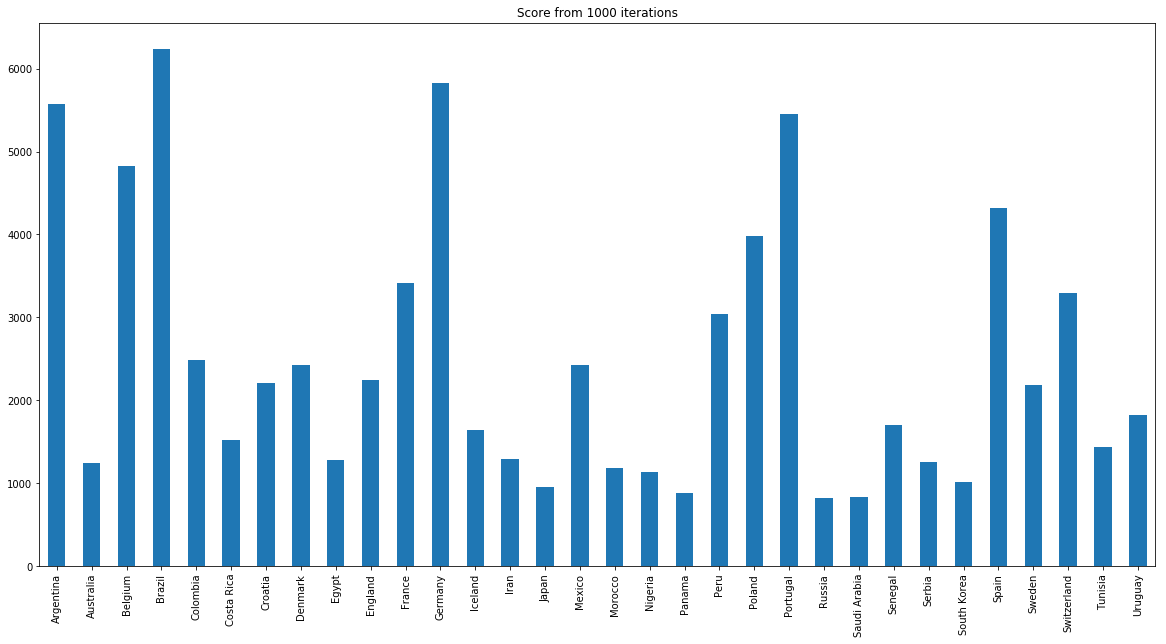

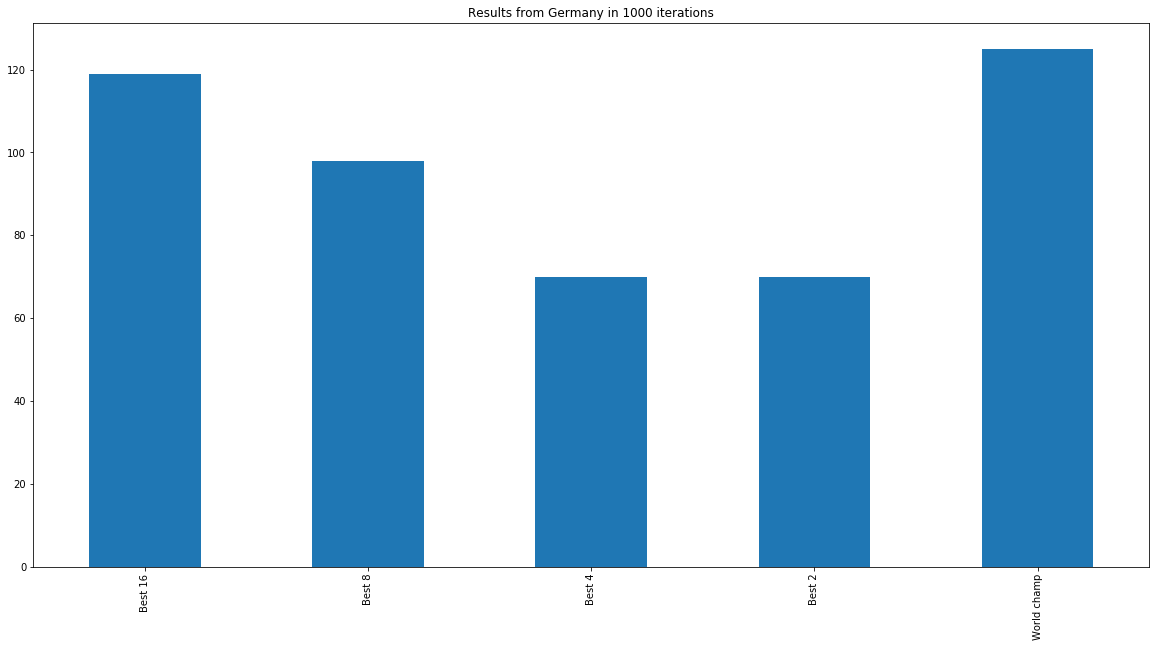

,total,ratio
Red,26645.708326,0.333071
Yellow,10567.516664,0.132094
Blue,12587.411666,0.157343
Green,9177.633332,0.114720
White,16888.513326,0.211106
Black,4133.216663,0.051665


In [19]:
# ==============================================================================
# SIMULATE A TOURNAMENT
# ==============================================================================

#team_list = load_data.team_list
finalists = group_phase(team_list)
print('\nThe winners and the second placed teams of the group phase are:')
print(finalists)
print('\nThe knockout phase is played and the results per round are:')
print(knockout(finalists))

# ______________________________________________________________________________
# play the tournament M times
# create the tracking of the results in dictionarys and dataframes
winner = dict((el, 0) for el in team_list)
df_winners = pd.DataFrame(winner, index=[0]).T
df_winners.columns=['Score']

# ______________________________________________________________________________
# define some empty columns to track the results
df_winners['Best 16 sum'] = df_winners['Score']
df_winners['Best 8 sum'] = df_winners['Score']
df_winners['Best 4 sum'] = df_winners['Score']
df_winners['Best 2 sum'] = df_winners['Score']
df_winners['World champ'] = df_winners['Score']

# ______________________________________________________________________________
# simulate the tournaments
Number_of_tournaments = 1000
for q in range(Number_of_tournaments):
    tournament(winner, df_winners)

# ______________________________________________________________________________
# for easier plotting convert dict to DataFrame

df_winners['Score'].plot(kind='bar', title='Score from %i iterations'%Number_of_tournaments, figsize=(20,10))
#plt.savefig('//nl/kpmg/ADV/Technology/Data & Analytics/D&A - Data & Analytics/Inhousedag 2/Output/results')
plt.show()

# ______________________________________________________________________________
# extract the results of how many times a team ended up in a certain level of the knock-out phase
df_winners['Best 2'] = df_winners['Best 2 sum'] - df_winners['World champ']
df_winners['Best 4'] = df_winners['Best 4 sum'] - df_winners[['World champ', 'Best 2']].sum(axis=1) 
df_winners['Best 8'] = df_winners['Best 8 sum'] - df_winners[['World champ', 'Best 2', 'Best 4']].sum(axis=1)
df_winners['Best 16'] = df_winners['Best 16 sum'] - df_winners[['World champ', 'Best 2', 'Best 4', 'Best 8']].sum(axis=1) 

# ______________________________________________________________________________
# plot some nice results of an individual country

country = 'Germany'
df_winners[['Best 16', 'Best 8', 'Best 4', 'Best 2', 'World champ']].loc[country].plot(kind='bar', figsize=(20,10), title='Results from %s in %i iterations'%(country, Number_of_tournaments))
plt.show()
# ______________________________________________________________________________
# Calculate color mix
colors = ['Red','Yellow','Blue','Green','White','Black']
Calc_colors(participants,df_winners,colors)

